# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data-cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
counter = 1

# Loop through all the cities in our list
for city in cities:
    
    #Use URL plus name of city to connect to openweathermap.org's endpoint
    city_url = url + "&q=" + city
        
    #print each city
    print(f"Processing Record {counter} | {city}")
    
    counter = counter + 1

    
    # run API request inside try-catch and place data in json format
    try:
        #get data in json format
        city_weather = requests.get(city_url).json()
        
        # parse data and place values into variables that will be used for creating a df
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #create dictionary using the data from openweathermap.org as the values
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"City {city} not found. Skipping to next city.")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | estelle
Processing Record 2 | pisco
Processing Record 3 | bogorodskoye
Processing Record 4 | muroto
Processing Record 5 | provideniya
Processing Record 6 | albany
Processing Record 7 | berlevag
Processing Record 8 | kaitangata
Processing Record 9 | pathalgaon
Processing Record 10 | rikitea
Processing Record 11 | svalyava
Processing Record 12 | half moon bay
Processing Record 13 | kavaratti
Processing Record 14 | severo-kurilsk
Processing Record 15 | marzuq
Processing Record 16 | paulo afonso
Processing Record 17 | nikolskoye
Processing Record 18 | chokurdakh
Processing Record 19 | jiuquan
Processing Record 20 | kendari
Processing Record 21 | ushuaia
Processing Record 22 | bredasdorp
Processing Record 23 | barrow
Processing Record 24 | ribeira grande
Processing Record 25 | kapaa
Processing Record 26 | saskylakh
Processing Record 27 | vaini
Processing Record 28 | ostrovnoy
Processing Record 29 | hermanus
Pr

Processing Record 212 | lerwick
Processing Record 213 | keti bandar
Processing Record 214 | chicaman
Processing Record 215 | nouakchott
Processing Record 216 | torbay
Processing Record 217 | houma
Processing Record 218 | dikson
Processing Record 219 | port macquarie
Processing Record 220 | guicheng
City guicheng not found. Skipping to next city.
Processing Record 221 | faanui
Processing Record 222 | turrialba
Processing Record 223 | zolotinka
City zolotinka not found. Skipping to next city.
Processing Record 224 | coihaique
Processing Record 225 | walvis bay
Processing Record 226 | bambanglipuro
Processing Record 227 | clyde river
Processing Record 228 | hithadhoo
Processing Record 229 | lubao
Processing Record 230 | jalu
Processing Record 231 | kortkeros
Processing Record 232 | ustye
Processing Record 233 | araouane
Processing Record 234 | balabac
Processing Record 235 | tasiilaq
Processing Record 236 | el alto
Processing Record 237 | san vicente
Processing Record 238 | tsiroanomandid

Processing Record 431 | bluffton
Processing Record 432 | sakakah
City sakakah not found. Skipping to next city.
Processing Record 433 | yar-sale
Processing Record 434 | sirajganj
Processing Record 435 | pio xii
Processing Record 436 | mayor pablo lagerenza
Processing Record 437 | port hawkesbury
Processing Record 438 | la ronge
Processing Record 439 | carbonia
Processing Record 440 | channel-port aux basques
Processing Record 441 | charters towers
Processing Record 442 | salinas
Processing Record 443 | mumford
Processing Record 444 | comodoro rivadavia
Processing Record 445 | ayan
Processing Record 446 | porto torres
Processing Record 447 | grand gaube
Processing Record 448 | jilib
Processing Record 449 | vidim
Processing Record 450 | hazorasp
Processing Record 451 | ambulu
Processing Record 452 | zhob
Processing Record 453 | deputatskiy
Processing Record 454 | kirakira
Processing Record 455 | terra nova
Processing Record 456 | caramay
Processing Record 457 | akyab
City akyab not found

-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          581
Cloudiness    581
Country       581
Date          581
Humidity      581
Lat           581
Max Temp      581
Wind Speed    581
lng           581
dtype: int64

In [9]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Max Temp,Wind Speed,lng
0,estelle,40,US,1542485700,48,32.87,69.98,16.11,-97.01
1,pisco,0,PE,1542484800,30,-13.71,71.60,19.46,-76.20
2,bogorodskoye,80,RU,1542487143,74,52.37,22.29,8.95,140.44
3,muroto,8,JP,1542487143,100,33.37,51.22,9.06,134.14
4,provideniya,68,RU,1542487143,100,64.42,33.45,18.34,-173.23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

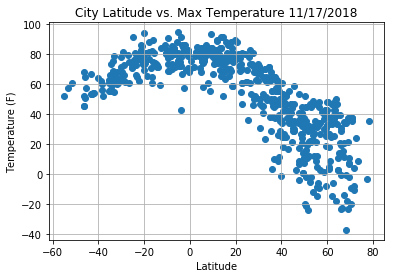

In [13]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, max_temps)
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("Temperature.png")

# Save the figure
plt.savefig("output_data-Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

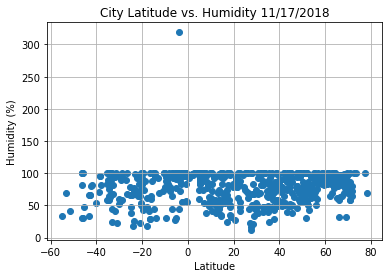

In [18]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, humidity)
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data-Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

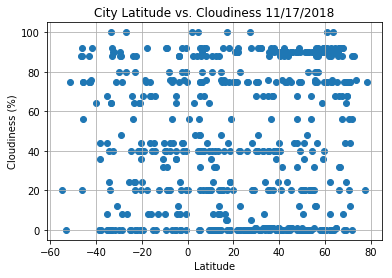

In [17]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data-Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

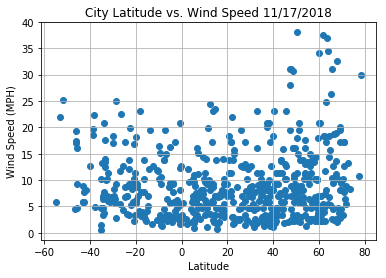

In [19]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, wind_speed)
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()

# Save the figure
plt.savefig("output_data-Fig3.png")

# Show plot
plt.show()